<IPython.core.display.Javascript object>


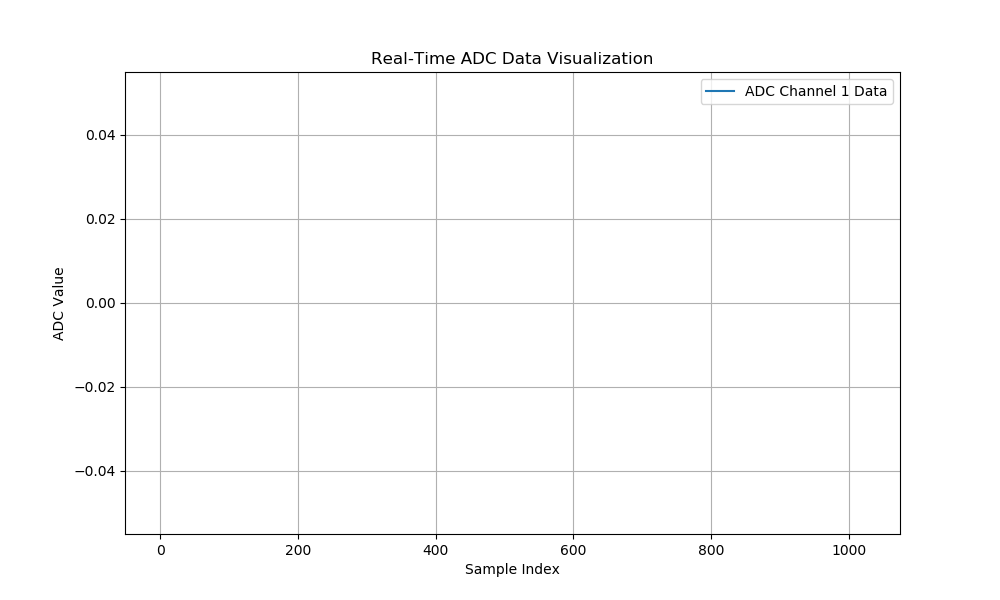

In [1]:
# Ensure you run this at the beginning of the notebook
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pynq import Overlay, allocate
from pynq.lib import DMA
import time

# Load the overlay
overlay = Overlay("dma.bit")  # Replace "dma.bit" with your overlay file name
dma = overlay.axi_dma  # DMA instance

# Configuration
TOTAL_SAMPLES = 1024  # Matches the Verilog parameter
BUFFER_SIZE = TOTAL_SAMPLES
DATA_WIDTH = 12  # Assuming 12-bit ADC data

# Allocate buffer for DMA
output_buffer = allocate(shape=(BUFFER_SIZE,), dtype=np.uint32)


# Select the receive channel from DMA
dma_recv = dma.recvchannel

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], label="ADC Data")
ax.set_xlim(0, data_size - 1)
ax.set_ylim(0, 4095)  # Assuming 12-bit ADC data, adjust as needed
ax.set_title("ADC Channel 1 - Real-Time")
ax.set_xlabel("Sample Index")
ax.set_ylabel("Value")
ax.grid(True)
ax.legend()

# Initialize the data
xdata, ydata = [], []

# Function to initialize the plot (needed for FuncAnimation)
def init():
    line.set_data([], [])
    return line,

# Update function for FuncAnimation
def update(frame):
    global output_buffer ,  dma_recv
    
   # Transfer data from the first memory bank
    dma_recv.transfer(output_buffer)
    dma_recv.wait()
    processed_data = output_buffer_0 & 0x0FFF  # Process data (12-bit)
    
    # Update xdata and ydata
    xdata.append(frame)
    ydata.append(processed_data[frame % data_size])  # Wrap around after data_size

    # Update the plot with new data
    line.set_data(xdata, ydata)
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=range(data_size), init_func=init, blit=True, interval=1)

# Display the animation
plt.show()

